# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as smd
import pylab

df = pd.read_csv('human_body_temperature.csv')
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


## Question 1: Is the distribution of body temperatures normal? 

- Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
- Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

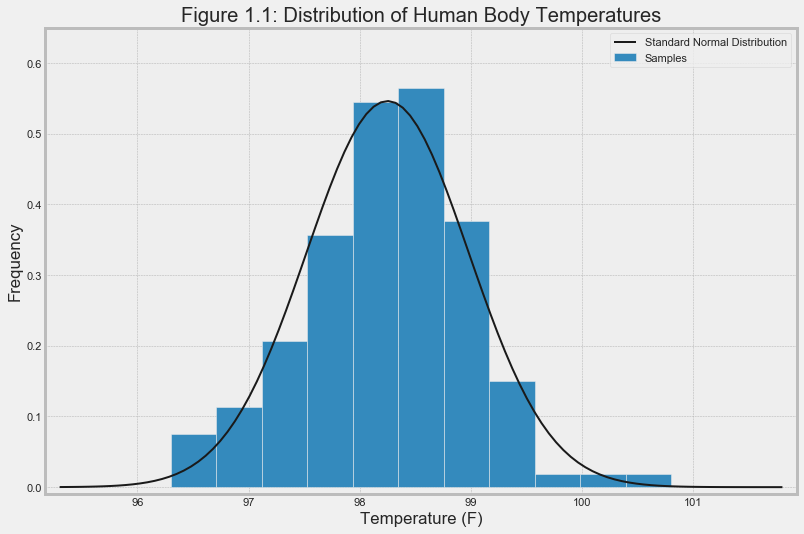

In [20]:
# Plot a histogram to determine whether the distribution is normal
temp = df. temperature

# Number of bins is the square root of number of data points
n_bins =np.sqrt(len(temp))

# Convert number of bins to an integer: n_bins
n_bins = int(n_bins)

# Plot histogram and labels
_ = plt.hist(temp, density=True, bins=n_bins)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Frequency')
_ = plt.title('Figure 1.1: Distribution of Human Body Temperatures')

# overlay PDF of the Standard Normal Distribution
x = np.linspace(np.min(temp) - 1, np.max(temp) + 1, 100, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(temp), scale=np.std(temp)) for _ in x]
plt.plot(x, pdf, 'k-')

#Set margins and add legend
_ = plt.margins(0.02)
_ = plt.legend(('Standard Normal Distribution', 'Samples'))
plt.ylim(-0.01, 0.65)

#Adjust chart size/style
sns.set(rc={"figure.figsize": (11, 8.5)})
plt.style.use('bmh')

plt.show()

Text(0.5, 1.0, 'Figure 1.2: Probability Plot of Human Body Temperatures')

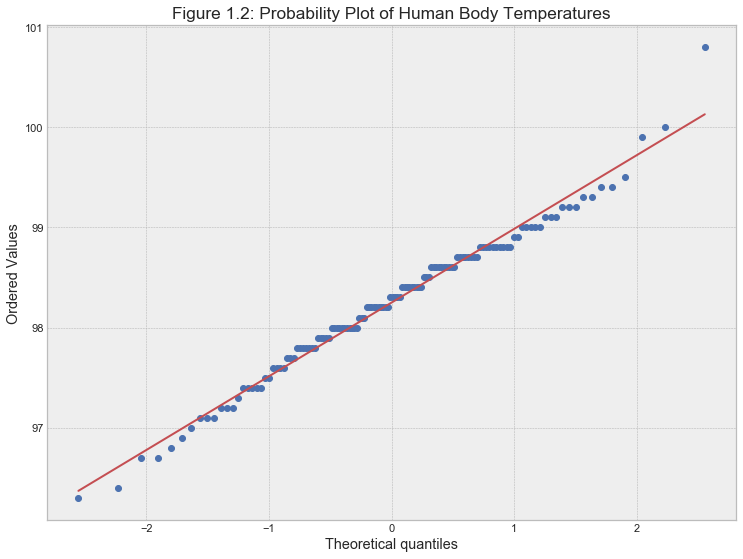

In [21]:
# Create probability plot of Human Body Temperatures
sns.set(rc={"figure.figsize": (11, 8.5)})
plt.style.use('bmh')

stats.probplot(temp, dist='norm', plot=pylab)
plt.title('Figure 1.2: Probability Plot of Human Body Temperatures')

In [23]:
# Define ecdf function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    
    #Number of data points: n
    n = len(data)
    
    # x: sort the data
    x = np.sort(data)
    
    # y: range for y-axis
    y = np.arange(1, n+1)/n
    
    return x, y

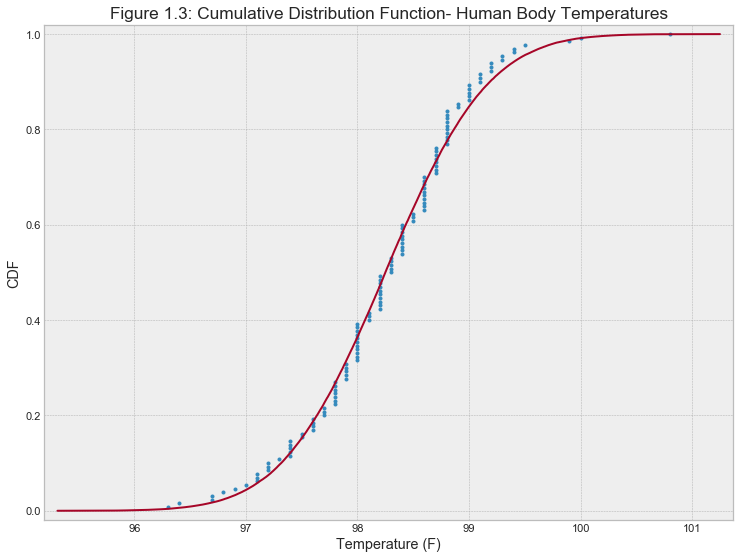

In [25]:
sns.set(rc={"figure.figsize": (11, 8.5)})
plt.style.use('bmh')

#Plot the CDFs
x, y = ecdf(temp)

#draw 100,000 random samples from a normal distribution
nm_temp = np.random.normal(np.mean(temp), np.std(temp), 100000)
nm_x, nm_y = ecdf(nm_temp)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(nm_x, nm_y)

_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.title('Figure 1.3: Cumulative Distribution Function- Human Body Temperatures')
_ = plt.margins(0.02)

plt.show()

**Analysis:**

Looking at Figure 1.1, the data is unimodal and tends to follow a Gaussian distribution, with the data being roughly symmetrical around the mean. From the probability plot in Figure 1.2 and the CDF in Figure 1.3, it is clear that the data is close to normal, with some variation and outliers on both tails. 


## Question 2: Is the sample size large? Are the observations independent?

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


**Analysis:**
Although the data sample is small relative to the total number of human beings on the planet, the data can be accepted as a sufficiently large sample because it is normally distributed (implying that the Central Limit theorem applies), unimodal, and symmetric about the mean, as shown in Figure 1.1. 

In order for the observations to be considered independent, each observation must have been taken independently from the rest and not had any influence on any other observations. Although gender can play a role in a person's body temperature (explored in question 6 below), it can be concluded that each observation was independent of the others. 

## Question 3: Is the true population mean really 98.6 degrees F? 
1. First, try a bootstrap hypothesis test.
2. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
3. In this situation, is it appropriate to use the t or z statistic?
4. Now try using the other test. How is the result be different? Why?

Hypothesis:
- Null hypothesis: mean of population = 98.6 degrees Fahrenheit
- Alternative hypothesis: mean of population does not equal 98.6 degrees Fahrenheit

In [27]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 3.1: Bootstrap hypothesis test

In [29]:
# Bootstrap hypothesis test- 100,000 samples
bs_replicates = np.empty(100000)

size=len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(temp, len(temp))
    bs_replicates[i] = np.mean(bs_sample)
    
p = np.sum(bs_replicates >= 98.6)/size

print('p-value: {}'.format(p))
print('mean: {:0.5}'.format(np.mean(bs_replicates)))

p-value: 0.0
mean: 98.249


**Analysis:**
After 100,000 samples, the p-value is 0.0, indicating that the null hypothesis (the population mean is 98.6 F) should be rejected. The mean body temperature of the sample set is 98.25 degrees Fahrenheit. 



### 3.2 Frequentist statistical testing

In frequentist statistical testing, you would use a one-sample test because you are comparing the mean of a single sample to a population with an hypothesized mean. The two sample test would be appropriate if you were comparing two samples.

### 3.3 t- or z- statistic? 

**Analysis:**

The formula for the z-statistic requires the standard deviation of the population, which is unknown. The t-statistic, on the other hand, only requires the standard deviation for the sample population, which means the only suitable option for this data is to use the t-statistic. 



### 3.4 t-statistic test

In [30]:
t_stat = stats.ttest_1samp(temp, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))

t-score: -5.45482
p-value: 0.0


### Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which test is the correct one to use? 
- What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [37]:
# t-test
sample_temp = np.random.choice(a = temp, size=10)

In [38]:
r = stats.ttest_1samp(sample_temp, 98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-score: -1.162
p-value: 0.2752


**Analysis:**

The t-test is the only test that can be used on this data as the standard deviation for the population is unknown. Using the t-test, the p-value is greater than 0.05, so the null hypothesis cannot be rejected. 


### Question 5: At what temperature should we consider someone's temperature to be "abnormal"

- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [39]:
# get the sample mean and standard deviation for use with bootstrap and frequentist approaches below
x_bar = np.mean(temp)
s = np.std(temp)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(x_bar, s))

sample mean: 98.25
sample standard deviation: 0.7304



### Bootstrap approach

In [40]:
# Calculates p value using 100,000 bootstrap replicates
boot_replicates = np.empty(100000)

size = len(boot_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(temp, size=len(temp))
    boot_replicates[i] = np.mean(bootstrap_sample)
    
p = np.sum(boot_replicates >= 98.6) / len(boot_replicates)
print('p-value: {}'.format(p))

x_bar = np.mean(boot_replicates)
ci = stats.norm.interval(0.95, loc=x_bar, scale=s)

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - x_bar)))

p-value: 0.0
95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315




### Frequentist Approach

In [41]:
# frequentist approach - confidence interval for the one-sample t-test

# alpha = 0.05, confidence coefficient = 95%

# Confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=x_bar, scale=s)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_low_f, ci_high_f))

# margin of error
print('margin of error: +/-{:0.5}'.format((ci_high_f - x_bar)))

95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315


**Analysis:**

According to both the Bootstrap and the Frequentist Approach, using a 95% confidence interval and calculated mean of 98.25 degrees Fahrenheit, a temperature below 96.818 or above 99.681 degrees Fahrenheit would be considered abnormal. 

### Question 6: Is there a significant difference between males and females in normal temperature? 

- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [43]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('Of the {} participants, {} are female and {} are male.'.format(len(males + females), len(females), len(males)))

Of the 130 participants, 65 are female and 65 are male.


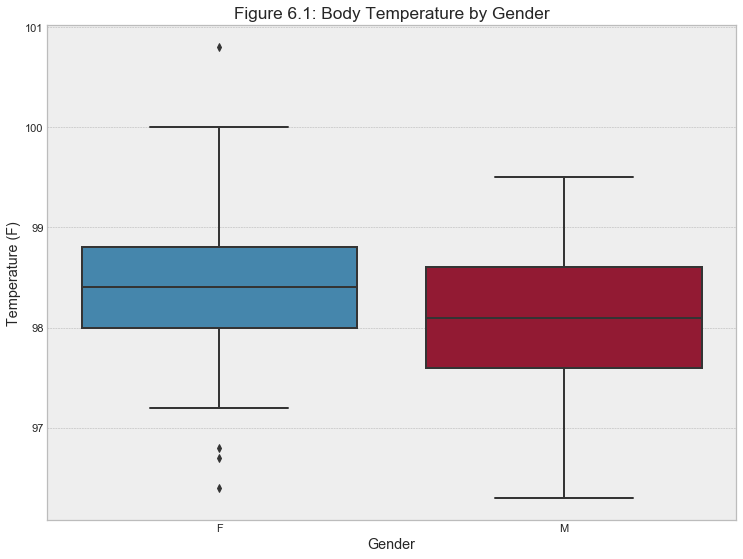

In [44]:
# Boxplot for overview, outliers
sns.boxplot(x='gender', y='temperature', data=df)

_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature (F)')
_ = plt.title('Figure 6.1: Body Temperature by Gender')

sns.set(rc={"figure.figsize": (11, 8.5)})
plt.style.use('bmh')

plt.show()


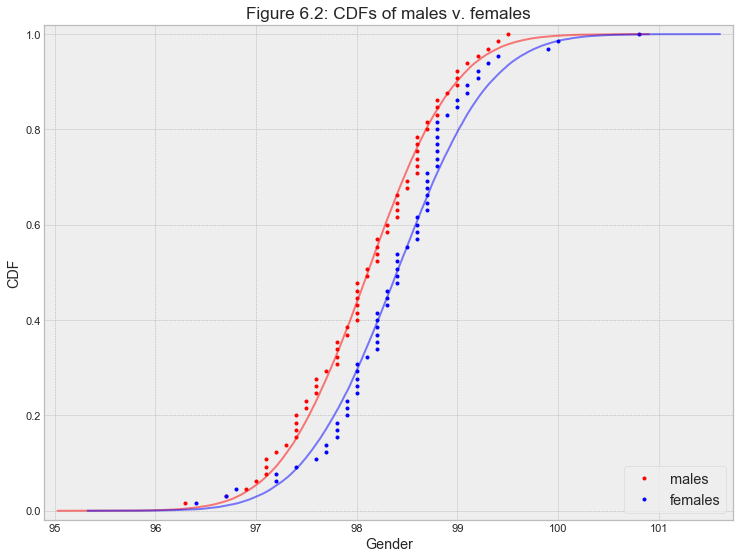

In [48]:
# are both samples normally distributed?
sns.set(rc={"figure.figsize": (11, 8.5)})
plt.style.use('bmh')

# Compute the ECDFs for males vs. females
x_male, y_male = ecdf(males.temperature)
x_female, y_female = ecdf(females.temperature)

# Generate plot
plt.plot(x_male, y_male, marker='.', linestyle='none', color='red')
plt.plot(x_female, y_female, marker='.', linestyle='none', color='blue')

# draw 100,000 random samples from a normal distribution of males data
m_norm_dist = np.random.normal(np.mean(males.temperature), np.std(males.temperature), 100000)
mnd_x, mnd_y = ecdf(m_norm_dist)
_ = plt.plot(mnd_x, mnd_y, color='red', alpha=0.5)

# draw 100,000 random samples from a normal distrubiton of female data
f_norm_dist = np.random.normal(np.mean(females.temperature), np.std(females.temperature), 100000)
fnd_x, fnd_y = ecdf(f_norm_dist)
_ = plt.plot(fnd_x, fnd_y, color='blue', alpha=0.5)

# axes and margins
_ = plt.margins(0.02)
_ = plt.xlabel('Gender')
_ = plt.ylabel('CDF')
_ = plt.title('Figure 6.2: CDFs of males v. females')
_ = plt.legend(('males', 'females'), loc='lower right', fontsize='large')

plt.show()

In [49]:
# common variables
temp_m = males.temperature
temp_f = females.temperature

In [50]:
# Check for identical variances
mv = np.var(temp_m)
fv = np.var(temp_f)

print('Male variance: {}\nFemale variance: {}'.format(mv, fv))

Male variance: 0.4807479289940825
Female variance: 0.5442698224852062


In [51]:
# confirm that variances are not equal with bootstrap - null hypothesis is that they are equal

size = 10000

bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.var(bs_sample_m)
    
bs_var_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.var(bs_sample_f)

bs_var_f = np.sum(bs_replicates_f)/size

bs_var_m
bs_var_f
print('Bootstrap verification:\nMale variance: {}\nFemale variance: {}'.format(bs_var_m, bs_var_f))

Bootstrap verification:
Male variance: 0.47350133538461525
Female variance: 0.5328923465088748


In [52]:
# Variances are not identical, so set `equal_var` to false to perform Welch's t-test
r = stats.ttest_ind(temp_m, temp_f, equal_var=False)
print('t-statistic: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))

t-statistic: -2.285
p-value: 0.02394


In [53]:
# males
print('MALES')
xbar_m = np.mean(temp_m)
s_m = np.std(temp_m)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_m, 3), round(s_m, 3)))

# confidence interval for one draw
ci_low_m, ci_high_m = stats.norm.interval(0.95, loc=xbar_m, scale=s_m)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_m, 3), round(ci_high_m, 3)))

# females
print('\n\nFEMALES')
xbar_f = np.mean(temp_f)
s_f = np.std(temp_f)
print('sample mean: {}\nsample standard deviation: {}\n'.format(round(xbar_f, 3), round(s_f, 3)))

# confidence interval for one draw
ci_low_f, ci_high_f = stats.norm.interval(0.95, loc=xbar_f, scale=s_f)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_f, 3), round(ci_high_f, 3)))

MALES
sample mean: 98.105
sample standard deviation: 0.693

95% confidence interval (one draw): 96.746 - 99.464


FEMALES
sample mean: 98.394
sample standard deviation: 0.738

95% confidence interval (one draw): 96.948 - 99.84


In [54]:
# bootstrap - two-sided Welch's t-test  
size = 10000
bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(temp_m, len(temp_m))
    bs_replicates_m[i] = np.mean(bs_sample_m)
    
bs_mean_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(temp_f, len(temp_f))
    bs_replicates_f[i] = np.mean(bs_sample_f)

bs_mean_f = np.sum(bs_replicates_f)/size


result = stats.ttest_ind(bs_replicates_f, bs_replicates_m, equal_var=False)

print('Welch\'s t-test:\nt-statistic: {:0.5}\np-value: {:0.5}'.format(result[0], result[1]))

Welch's t-test:
t-statistic: 230.97
p-value: 0.0


**Analysis/Story:**

After analyzing the data (130 observations, 65 males, 65 females), the mean human body temperature was calculated to be 98.25 degrees Fahrenheit, rather than the hypothesized 98.6 degrees Fahrenheit. 

The first step in the exploratory data analysis was to create a boxplot, seen in figure 6.1. From the boxplot, it is clear that females have a slightly higher mean temperature than the males in the sample, with a few outliers in the data, as represented by the points outside of the boxplot whiskers. 

The next step was to create a CDF of both samples to determine if they follow a normal Gaussian distribution. From the CDF in Figure 6.2, it is cledar that both sample sets roughly follow a normal distribution, with the females' body temperature data slightly warmer and having more variations than the males' data. 

In order to test the null hypothesis (mean male body temperature is equal to mean female body temperature), an unequal variance t-test was used as the calculated variances of the data sets were not equal. Since the null hypothesis is that the means are equal, a two-tailed t-test is required. 

The p-values of 0.0 and the t-statistics for both the bootstrap and frequentist hypothesis tests lead the null hypothesis to be rejected and support the alternative hypothesis that mean male and female body temperatures are different. 